- American express : Integrated payments company (Bank) - AXP
- Bank of America : Bank (Bank) - BAC
- Boeing : Aerospace (Manufacturer-Aero) - BA
- Cisco : Computer networking products (Manufacturer-Sys) - CSCO
- Xerox : sells print and digital document products and services (Seller) - XRX
- Honda : manufacturer of motorcycles and a major producer of automobiles (Manufacturer-Auto) - HMC
- HP : manufacturer of software and computer services (Manufacturer-Sys) - HPQ
- Intel : manufacturer of Semiconductors Computer hardware (Manufacturer-Sys) - INTC
- Johnson & Johnson : healthcare company (healthcare) - JNJ
- 3M : healthcare company (healthcare) - MMM
- Microsoft : technology company (Manufacturer-Sys) - MSFT
- Pepsi : food and beverage company (food&beverage) - PEP
- Pfizer : pharmaceutical and biotechnology corporation (healthcare) - PFE
- Sony : consumer electronics products (Manufacturer- electronics) - SONY
- Toyota : automobile manufacturer (Manufacturer-Auto) - TM
- Canon : imaging technologies (Manufacturer) - CAJ 
- Colgate-Palmolive : manufactures and distributes cleaning products,dental care (Manufacturer) - CL
- JPMorgan Chase : financial services (IT) - JPM
- Caterpillar : Industrials (Manufacturer)- CAT
- Walgreen : pharmacy-led health (healthcare) - WBA
- American International Group : insurance organization (insurance) - AIG
- Home Depot : home improvement retailer (Seller)- HD
- Mitsubishi : develops and operates businesses (including industrial finance, energy, metals, machinery, chemicals, living essentials and environmental business) (dev&op)- MUFG
- Texas instruments : semiconductor company (Manufacturer-Sys) - TXN
- Unilever : multinational consumer goods company (food) - UL
- Valero Energy : distributor and marketer of transportation fuels (dist) - VLO
- Exxon : petroleum and chemical manufacturing company (Manufacturer)- XOM

- Sectors:
    - Banking
    - Manufacturer
    - Insurance
    - Food
    - HealthCare
    - Seller
    - IT
    - Distributor
    - Dev&Op

In [2]:
tk=["AXP","BAC","CSCO","XRX","HMC","HPQ","INTC","JNJ","MMM","MSFT","PEP","PFE","SONY","TM","BA","CAJ","CL","JPM","CAT","WBA","AIG","HD","MUFG","TXN","UL","VLO","XOM"]

In [4]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 

In [194]:
stock_data = yf.download(tk , start = '2010-01-01', end = '2022-01-01')['Adj Close']

[*********************100%***********************]  27 of 27 completed


In [195]:
stock_data.head()

,AIG,AXP,BA,BAC,CAJ,CAT,CL,CSCO,HD,HMC,...,PEP,PFE,SONY,TM,TXN,UL,VLO,WBA,XOM,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,20.248112,33.462379,42.180119,12.710672,41.420544,40.251389,30.247013,17.000513,21.443455,33.738770,...,41.871986,10.693039,29.000000,71.532616,18.803413,20.430889,10.017328,25.916803,41.415257,15.013357
2010-01-04,20.187325,33.792686,43.777554,13.242396,42.311203,41.353191,30.504766,17.533100,21.250748,34.525009,...,42.175022,11.128052,30.020000,72.314575,18.767338,20.571783,10.699107,26.326168,41.998306,15.315045
2010-01-05,19.809111,33.718369,45.211342,13.672836,42.643974,41.847603,30.751434,17.454992,21.406397,34.286152,...,42.684647,10.969334,29.879999,71.201134,18.659111,20.123455,10.974212,26.114424,42.162304,15.332784
2010-01-06,19.680794,34.263416,46.582806,13.833199,42.595039,41.974728,30.681490,17.341375,21.332277,33.987579,...,42.257660,10.934061,29.850000,72.110580,18.522013,20.014582,11.249315,25.916803,42.526684,15.190820
2010-01-07,19.302567,34.819122,48.468559,14.288958,41.410759,42.144222,30.559988,17.419489,21.584295,33.410339,...,41.989063,10.892910,29.799999,71.218140,18.579735,19.873678,11.333036,26.072075,42.393093,15.261806


In [196]:
### Checking for any null values i.e. whether the company data exists for the given period
stock_data.isnull().sum()

AIG     0
AXP     0
BA      0
BAC     0
CAJ     0
CAT     0
CL      0
CSCO    0
HD      0
HMC     0
HPQ     0
INTC    0
JNJ     0
JPM     0
MMM     0
MSFT    0
MUFG    0
PEP     0
PFE     0
SONY    0
TM      0
TXN     0
UL      0
VLO     0
WBA     0
XOM     0
XRX     0
dtype: int64

In [197]:
stock_data.shape

(3022, 27)

In [198]:
stock_data_copy = stock_data

In [199]:
stock_data_copy.head()

,AIG,AXP,BA,BAC,CAJ,CAT,CL,CSCO,HD,HMC,...,PEP,PFE,SONY,TM,TXN,UL,VLO,WBA,XOM,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,20.248112,33.462379,42.180119,12.710672,41.420544,40.251389,30.247013,17.000513,21.443455,33.738770,...,41.871986,10.693039,29.000000,71.532616,18.803413,20.430889,10.017328,25.916803,41.415257,15.013357
2010-01-04,20.187325,33.792686,43.777554,13.242396,42.311203,41.353191,30.504766,17.533100,21.250748,34.525009,...,42.175022,11.128052,30.020000,72.314575,18.767338,20.571783,10.699107,26.326168,41.998306,15.315045
2010-01-05,19.809111,33.718369,45.211342,13.672836,42.643974,41.847603,30.751434,17.454992,21.406397,34.286152,...,42.684647,10.969334,29.879999,71.201134,18.659111,20.123455,10.974212,26.114424,42.162304,15.332784
2010-01-06,19.680794,34.263416,46.582806,13.833199,42.595039,41.974728,30.681490,17.341375,21.332277,33.987579,...,42.257660,10.934061,29.850000,72.110580,18.522013,20.014582,11.249315,25.916803,42.526684,15.190820
2010-01-07,19.302567,34.819122,48.468559,14.288958,41.410759,42.144222,30.559988,17.419489,21.584295,33.410339,...,41.989063,10.892910,29.799999,71.218140,18.579735,19.873678,11.333036,26.072075,42.393093,15.261806


In [200]:
# Analyzing the company data between the year 2019 to 2020

In [201]:
from finquant.portfolio import build_portfolio

In [202]:
# data between 2019 to 2020
names = tk
start_date = '2019-05-01' #may
end_date = '2020-05-01' # april
pf_20 = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date,
                    data_api='yfinance')

[*********************100%***********************]  27 of 27 completed


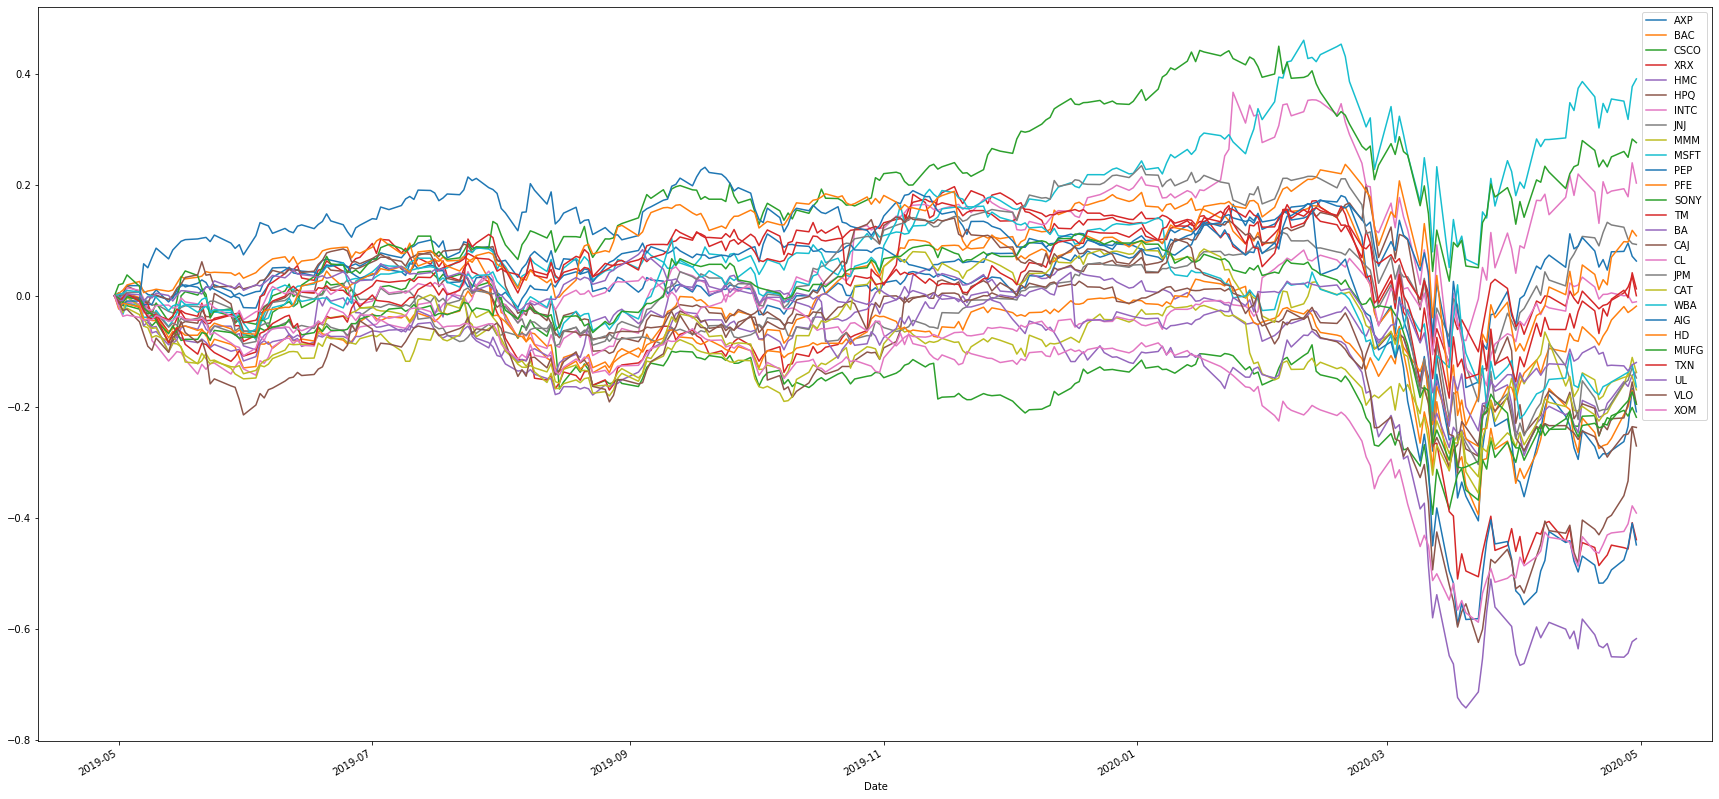

In [203]:
pf_20.comp_cumulative_returns().plot(legend=True, figsize=(30, 15))

- stock market crash due to covid-19 till April, 2020

In [204]:
# Analyzing stock data using k-means clustering

In [205]:
daily_returns = stock_data_copy.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_var_returns = daily_returns.var() * 252

In [206]:
data2 = pd.DataFrame(stock_data_copy.columns, columns=['Stock_symbols'])
data2['Returns'] = annual_mean_returns.values
data2['Variances'] = annual_var_returns.values
data2

,Stock_symbols,Returns,Variances
0,AIG,0.148670,0.127464
1,AXP,0.172892,0.083847
2,BA,0.193422,0.125933
3,BAC,0.164262,0.122193
4,CAJ,-0.015866,0.056017
5,CAT,0.176565,0.083695
6,CL,0.100727,0.032413
7,CSCO,0.142550,0.070342
8,HD,0.271834,0.051835
9,HMC,0.015114,0.058662


In [207]:
# using elbow method to find optimum no of clusters

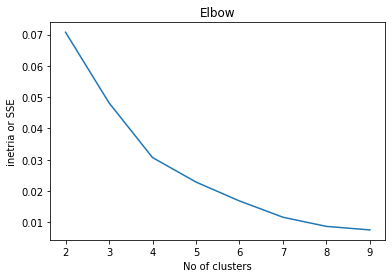

In [208]:
X=data2[['Returns','Variances']].values
inertia_list = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(2,10),inertia_list)
plt.title('Elbow')
plt.xlabel("No of clusters")
plt.ylabel("inetria or SSE")
plt.show()

In [209]:
kmeans = KMeans(n_clusters=4).fit(X)
labels=kmeans.labels_
labels

array([2, 2, 2, 2, 3, 2, 1, 1, 0, 3, 2, 2, 1, 2, 1, 0, 3, 1, 1, 2, 1, 0,
       1, 0, 1, 3, 2])

In [210]:
data2['Cluster_Lables'] =labels
data2.head()

,Stock_symbols,Returns,Variances,Cluster_Lables
0,AIG,0.148670,0.127464,2
1,AXP,0.172892,0.083847,2
2,BA,0.193422,0.125933,2
3,BAC,0.164262,0.122193,2
4,CAJ,-0.015866,0.056017,3


Text(0, 0.5, 'Variances')

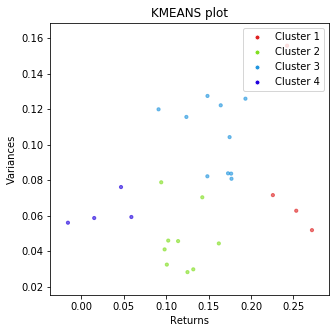

In [211]:
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#2000DF'] #
data2['c'] = data2.Cluster_Lables.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(5,5))
# plot data
plt.scatter(X[:,0],X[:,1], c=data2.c, alpha = 0.6, s=10)
# create a list of legend elemntes
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
plt.title("KMEANS plot")
plt.xlabel("Returns")
plt.ylabel("Variances")

# From the above plot we can say that companies in :
- cluster 1 had high return with risk
- cluster 2 had expected return with minimum risk
- cluster 3 had expected return with high risk
- cluster 4 had low return with risk 

In [213]:
def diverse_portfolio():
    for i in range(0,4):
        symbol = data2[data2['Cluster_Lables']==i].head(1)
        print(symbol[['Stock_symbols','Cluster_Lables']])

In [214]:
# Randomly selecting one company from each cluster

In [215]:
diverse_portfolio()

  Stock_symbols  Cluster_Lables
8            HD               0
  Stock_symbols  Cluster_Lables
6            CL               1
  Stock_symbols  Cluster_Lables
0           AIG               2
  Stock_symbols  Cluster_Lables
4           CAJ               3


----------------------------------------------------------------------------------------

In [216]:
# Minimum risk with expected returns using edhec_risk_kit_206

In [217]:
import edhec_risk_kit_206 as erk

In [218]:
stock_returns_monthly = daily_returns.resample('M').apply(erk.compound).to_period('M')
stock_returns_monthly.head()

,AIG,AXP,BA,BAC,CAJ,CAT,CL,CSCO,HD,HMC,...,PEP,PFE,SONY,TM,TXN,UL,VLO,WBA,XOM,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2009-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01,-0.191795,-0.066533,0.119527,0.007969,-0.075851,-0.077094,-0.020364,-0.061403,-0.031801,0.000295,...,-0.019407,0.025839,0.145862,-0.085076,-0.132182,-0.043260,0.099702,-0.018246,-0.055140,0.030733
2010-02,0.022287,0.014073,0.049360,0.097496,0.060598,0.092075,0.036361,0.082777,0.113888,0.020643,...,0.047803,-0.050604,0.026482,-0.028182,0.083556,-0.026304,-0.046211,-0.018424,0.015428,0.074541
2010-03,0.378280,0.085097,0.149620,0.072081,0.114031,0.101666,0.027972,0.069872,0.044572,0.019647,...,0.066591,-0.022792,0.123424,0.084163,0.003691,-0.005435,0.124430,0.052497,0.030462,0.045188
2010-04,0.139426,0.117789,-0.002479,-0.001121,-0.011469,0.090131,-0.007395,0.034576,0.089026,-0.042505,...,-0.014208,-0.025073,-0.106994,-0.041408,0.067762,0.028006,0.055330,-0.052305,0.011794,0.117949


In [219]:
stock_returns_monthly = stock_returns_monthly.iloc[1: , :]

In [220]:
#Summary stats for companies : returns and volatility
erk.summary_stats(stock_returns_monthly)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
AIG,0.088260,0.334543,0.056357,7.349617,0.136511,0.194270,0.169036,-0.600738
AXP,0.140169,0.230730,-0.312877,6.537035,0.096995,0.156164,0.464446,-0.422441
BA,0.139108,0.321934,0.001893,9.925618,0.124004,0.171754,0.329406,-0.671783
BAC,0.108458,0.322530,-0.064163,3.570594,0.140290,0.182275,0.236341,-0.693055
CAJ,-0.043043,0.198502,0.003868,3.924559,0.094815,0.127165,-0.358340,-0.678202
CAT,0.143877,0.274700,0.113269,3.546494,0.112194,0.144327,0.403152,-0.396033
CL,0.088112,0.146031,-0.014474,3.526492,0.060885,0.082639,0.387142,-0.192683
CSCO,0.113012,0.252686,-0.038938,3.259652,0.108389,0.143936,0.319432,-0.420224
HD,0.278054,0.201162,-0.046899,4.018704,0.072459,0.099880,1.200151,-0.198028
HMC,-0.014108,0.218339,-0.051015,3.091954,0.103302,0.130262,-0.196868,-0.483467


In [221]:
stock_returns_monthly.shape

(144, 27)

In [222]:
stock_returns_monthly_copy=stock_returns_monthly

In [223]:
#cummulating montly return
cum_monthly_returns = ((stock_returns_monthly +1).cumprod())

Text(0.5, 1.0, 'Cummulative returns of companies')

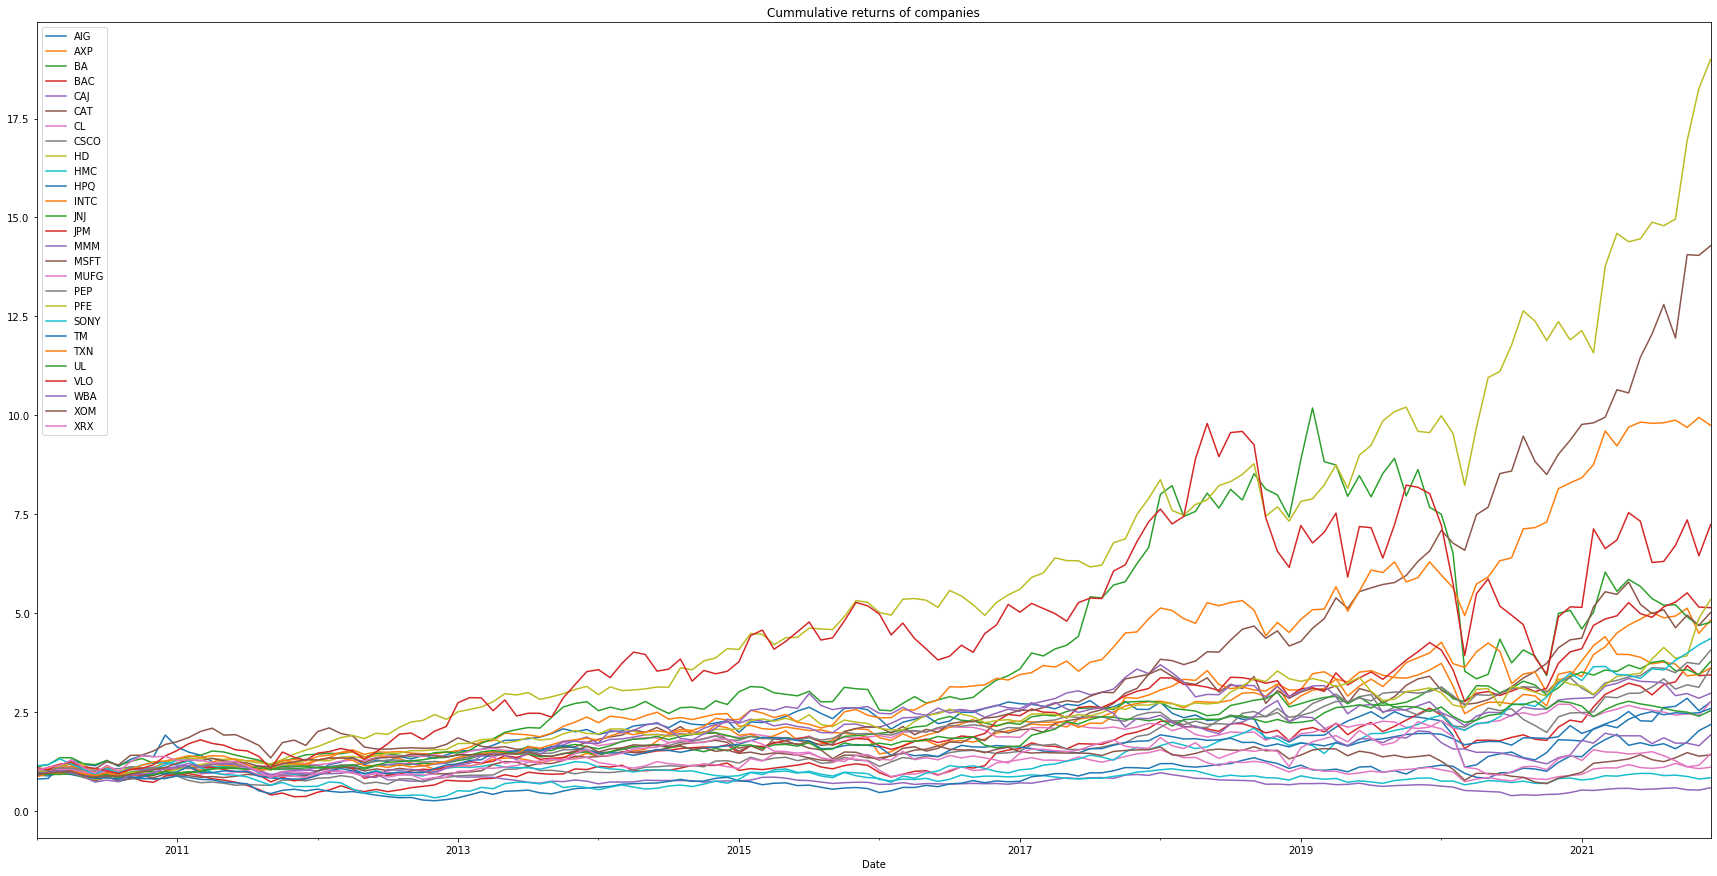

In [224]:
cum_monthly_returns.plot(legend=True, figsize=(30, 15))
plt.title("Cummulative returns of companies")

- HD company stock has the highest return compared to other companies

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV,0.080459,0.121629,-0.534145,3.603260,0.055094,0.077919,0.403634,-0.247766
GMV_SHRINKAGE,0.092549,0.119482,-0.389231,3.304337,0.051966,0.072895,0.509385,-0.187231
ERC,0.140025,0.134654,-0.501402,4.662318,0.055942,0.083497,0.795164,-0.215672


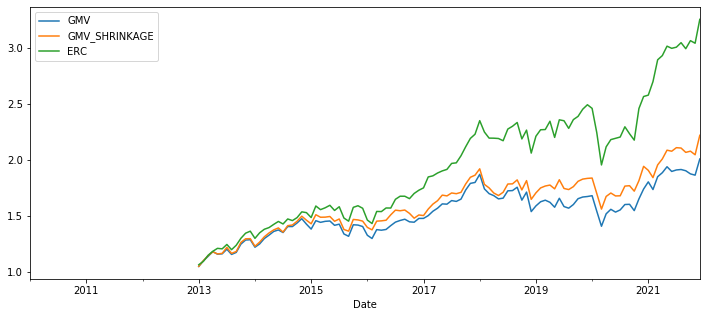

In [226]:
#comparing the GMV, GMV_Shirnkage & equal_risk portfolios
gmv = erk.backtest_ws(r=stock_returns_monthly,estimation_window=36, weighting=erk.weight_gmv,cov_estimator=erk.sample_cov )
gmv_shrink = erk.backtest_ws(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov)
equal_risk = erk.backtest_ws(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_erc, cov_estimator=erk.shrinkage_cov)
btr1= pd.DataFrame({'GMV':gmv, 'GMV_SHRINKAGE':gmv_shrink, 'ERC':equal_risk})
(1+btr1).cumprod().plot(figsize=(12,5))
erk.summary_stats(btr1.dropna())

equal_risk strategy has maximum sharpe ratio i.e. 80% when compared to gvm methods but we won't be using it as we want to have a portfolio with companies having maximum return with minimum risk. Hence, choosing the next suitable portfolio strategy i.e. gvm shrinkage with sharpe ratio as 51%

In [227]:
#calculating covariance matrix using shrinkage method
cov_shrinkage = erk.shrinkage_cov(stock_returns_monthly)

In [228]:
cov_shrinkage

,AIG,AXP,BA,BAC,CAJ,CAT,CL,CSCO,HD,HMC,...,PEP,PFE,SONY,TM,TXN,UL,VLO,WBA,XOM,XRX
AIG,0.009327,0.002969,0.003611,0.004198,0.002186,0.003314,0.001466,0.002872,0.002365,0.002489,...,0.001272,0.001497,0.003302,0.001891,0.002395,0.001615,0.004945,0.002400,0.002628,0.003905
AXP,0.002969,0.004436,0.002939,0.002971,0.001335,0.002310,0.001035,0.002135,0.001496,0.001759,...,0.001005,0.001199,0.002024,0.001255,0.001719,0.001061,0.003515,0.001703,0.002037,0.003177
BA,0.003611,0.002939,0.008637,0.003352,0.001907,0.002676,0.001342,0.002557,0.001908,0.002556,...,0.001364,0.001457,0.002817,0.001762,0.002310,0.001543,0.004317,0.002590,0.002547,0.004276
BAC,0.004198,0.002971,0.003352,0.008669,0.001773,0.003227,0.001094,0.002821,0.002225,0.002804,...,0.001063,0.001709,0.003350,0.002113,0.002426,0.001078,0.005185,0.002365,0.002493,0.003773
CAJ,0.002186,0.001335,0.001907,0.001773,0.003284,0.001647,0.000649,0.001477,0.001071,0.001550,...,0.000619,0.000733,0.001790,0.001202,0.001315,0.000824,0.001755,0.001621,0.001205,0.002248
CAT,0.003314,0.002310,0.002676,0.003227,0.001647,0.006288,0.000991,0.002291,0.001748,0.001982,...,0.000919,0.001331,0.002731,0.001364,0.002292,0.001205,0.003956,0.002078,0.002123,0.003286
CL,0.001466,0.001035,0.001342,0.001094,0.000649,0.000991,0.001777,0.001110,0.000982,0.000797,...,0.000931,0.000893,0.001130,0.000679,0.000951,0.001047,0.001589,0.001057,0.000872,0.001520
CSCO,0.002872,0.002135,0.002557,0.002821,0.001477,0.002291,0.001110,0.005321,0.001752,0.001959,...,0.001031,0.001539,0.002521,0.001223,0.001924,0.001246,0.003353,0.002055,0.001778,0.003004
HD,0.002365,0.001496,0.001908,0.002225,0.001071,0.001748,0.000982,0.001752,0.003372,0.001399,...,0.000965,0.001325,0.001732,0.001064,0.001581,0.001042,0.002699,0.001411,0.001536,0.002145
HMC,0.002489,0.001759,0.002556,0.002804,0.001550,0.001982,0.000797,0.001959,0.001399,0.003973,...,0.000731,0.001144,0.002247,0.001693,0.001679,0.000815,0.003175,0.001752,0.001610,0.002716


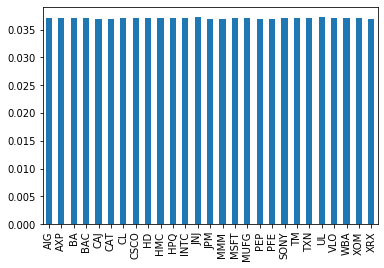

In [229]:
#equal risk contribution portfolio
equal_risk_weights = erk.equal_risk_contributions(cov_shrinkage)
erk.risk_contribution(equal_risk_weights, cov_shrinkage).plot(kind='bar')

Using equal risk contribution strategy, the weights are allocated in such way that all companies have equal amount of risk as shown in the above plot

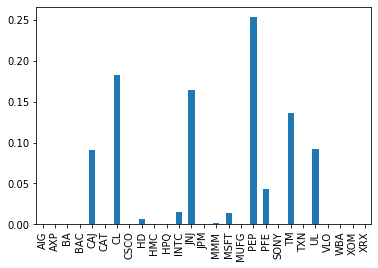

In [230]:
#using weights of gmv shrinkage porfolio to find risk contributions
weights = erk.weight_gmv(stock_returns_monthly,erk.shrinkage_cov)
erk.risk_contribution(weights, cov_shrinkage).plot(kind='bar')

In [231]:
#montly portfolio returns
port_returns = stock_returns_monthly.mul(weights, axis=1).sum(axis=1) #weights(gvm_shrinkage)
port_returns.head()

Date
2010-01   -0.035957
2010-02    0.019498
2010-03    0.050025
2010-04   -0.010749
2010-05   -0.069410
Freq: M, dtype: float64

In [232]:
#creating column for portfolio monthly returns
stock_returns_monthly['portfolio_returns'] = port_returns

In [233]:
#cummulative portfolio returns
port_cum_ret = ((1+port_returns).cumprod()-1)

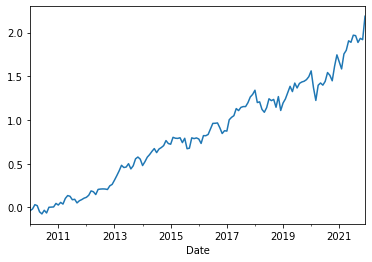

In [234]:
#plotting portfolio cummulative returns
port_cum_ret.plot()

In [235]:
# gvm shrinkage weights contribution 
stock_columns = daily_returns.columns
final_weights = pd.DataFrame(weights, index=stock_columns)
final_weights

,0
AIG,0.000000e+00
AXP,1.793132e-13
BA,0.000000e+00
BAC,0.000000e+00
CAJ,9.154289e-02
CAT,1.337787e-13
CL,1.822738e-01
CSCO,0.000000e+00
HD,6.264504e-03
HMC,3.906851e-13


GMV_SHRINKAGE returned a portfolio strategy with 0.092549 return and 12% risk-low return with risk

---------------------------------------------------------------------------------------

In [173]:
# Portfolio Optimization using Monte Carlo Simulation-minize function

In [83]:
stock_data_mcs = stock_data

In [84]:
stock_data_mcs.head()

,AIG,AXP,BA,BAC,CAJ,CAT,CL,CSCO,HD,HMC,...,PEP,PFE,SONY,TM,TXN,UL,VLO,WBA,XOM,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,20.248114,33.462376,42.180107,12.710675,41.420544,40.251381,30.247026,17.000507,21.443459,33.738770,...,41.871983,10.693043,29.000000,71.532616,18.803413,20.430883,10.017328,25.916811,41.415241,15.013361
2010-01-04,20.187332,33.792690,43.777546,13.242395,42.311203,41.353195,30.504751,17.533110,21.250738,34.525009,...,42.175018,11.128054,30.020000,72.314575,18.767338,20.571783,10.699108,26.326162,41.998314,15.315042
2010-01-05,19.809105,33.718384,45.211346,13.672841,42.643974,41.847603,30.751440,17.454990,21.406401,34.286152,...,42.684643,10.969331,29.879999,71.201126,18.659107,20.123459,10.974210,26.114426,42.162289,15.332791
2010-01-06,19.680786,34.263412,46.582802,13.833197,42.595039,41.974728,30.681484,17.341373,21.332275,33.987579,...,42.257656,10.934060,29.850000,72.110588,18.522015,20.014580,11.249314,25.916811,42.526695,15.190813
2010-01-07,19.302572,34.819138,48.468552,14.288956,41.410759,42.144222,30.560001,17.419485,21.584290,33.410339,...,41.989075,10.892910,29.799999,71.218132,18.579739,19.873684,11.333038,26.072073,42.393089,15.261807


In [85]:
log_returns = np.log(stock_data_mcs/stock_data_mcs.shift())

In [86]:
np.random.seed(100)

# Monte Carlo Simulation Using minize function
n = 5000
 
weights = np.zeros((n, 27))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)
 
for i in range(n):
    weight = np.random.random(27)
    weight /= weight.sum()
    weights[i] = weight
     
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [87]:
weights[sharpe_ratios.argmax()]

array([0.0104247 , 0.03298149, 0.07562204, 0.0082532 , 0.02299324,
       0.05997989, 0.02690937, 0.03803103, 0.04356153, 0.00474952,
       0.00631898, 0.02160521, 0.07711198, 0.05799467, 0.02527217,
       0.08198395, 0.00234344, 0.0767607 , 0.05021615, 0.00559025,
       0.07093466, 0.05945553, 0.06549586, 0.02595078, 0.00339962,
       0.01658851, 0.02947151])

Text(0, 0.5, 'Expected Return')

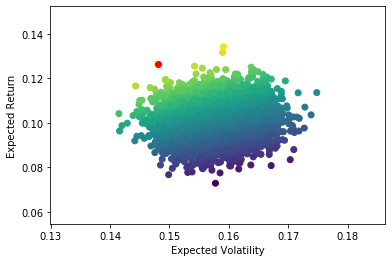

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

From the above plot we can see that with the inital portfolio we get 13% return with 15% risk (approx.)

In [89]:
# portfolio optimization

In [90]:
log_ret=log_returns

In [91]:
#returns back an array of mean return, mean volatility and sharpe ratio.
def get_ret_vol_sr(weights):
    """
    Takes in weights and returns back an array of mean return, mean volatility and sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [92]:
from scipy.optimize import minimize 

In [93]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [94]:
# Constraints
def check_sum(weights):
    return np.sum(weights) - 1
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [95]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1))

In [96]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25]
# Sequential Least Squares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
opt_results

     fun: -1.2510977035876194
     jac: array([ 7.55891874e-01,  3.24519306e-01,  1.42095983e-03,  8.72654051e-01,
        1.08153264e+00,  5.10257363e-01,  2.18257204e-01,  5.12806833e-01,
       -3.90335917e-04,  1.03885268e+00,  1.11118165e+00,  2.30690837e-01,
        2.53617764e-04,  3.11219171e-01,  3.75022724e-01,  4.50417399e-04,
        8.57931823e-01, -2.39640474e-04,  7.06007332e-02,  6.26878902e-01,
        4.01392952e-01,  2.43023038e-04,  1.88042715e-01,  2.93552876e-04,
        4.80539367e-01,  6.79479927e-01,  8.03287417e-01])
 message: 'Optimization terminated successfully.'
    nfev: 233
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.00000000e+00, 1.81022494e-16, 1.01602703e-01, 0.00000000e+00,
       4.47604335e-17, 9.78365442e-16, 1.42152596e-16, 0.00000000e+00,
       4.63940397e-01, 0.00000000e+00, 0.00000000e+00, 4.08230069e-16,
       8.17054289e-02, 0.00000000e+00, 1.14756643e-16, 1.12867025e-01,
       0.00000000e+00, 1.98459214e-01, 1.6

In [97]:
opt_results.x

array([0.00000000e+00, 1.81022494e-16, 1.01602703e-01, 0.00000000e+00,
       4.47604335e-17, 9.78365442e-16, 1.42152596e-16, 0.00000000e+00,
       4.63940397e-01, 0.00000000e+00, 0.00000000e+00, 4.08230069e-16,
       8.17054289e-02, 0.00000000e+00, 1.14756643e-16, 1.12867025e-01,
       0.00000000e+00, 1.98459214e-01, 1.68852975e-16, 0.00000000e+00,
       0.00000000e+00, 1.77327321e-02, 3.05518011e-16, 2.36924996e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [98]:
get_ret_vol_sr(opt_results.x)#return,voltality,sharpe_ratio

array([0.186289  , 0.14890044, 1.2510977 ])

 When we optimize the portfolio and use minimize function to minimize negative sharpe ratio, we got 19% return with 15% risk

In [105]:
# Portfolio Optmization using Monte Carlo Simulation

In [126]:
names = tk
start_date = '2010-01-01'
end_date = '2022-01-01'
pf = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date,
                    data_api='yfinance')

[*********************100%***********************]  27 of 27 completed


In [127]:
pf.data.head(3)

,AXP,BAC,CSCO,XRX,HMC,HPQ,INTC,JNJ,MMM,MSFT,...,JPM,CAT,WBA,AIG,HD,MUFG,TXN,UL,VLO,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,33.462379,12.710676,17.000507,15.013363,33.738770,16.855900,13.697958,44.093697,57.213879,23.323427,...,29.860201,40.251389,25.916807,20.248116,21.443457,4.92,18.803415,20.430887,10.017327,41.415245
2010-01-04,33.792686,13.242395,17.533104,15.315042,34.525009,17.163502,14.020263,44.278526,57.456127,23.683073,...,30.742649,41.353188,26.326172,20.187326,21.250746,4.97,18.767344,20.571781,10.699108,41.998306
2010-01-05,33.718376,13.672838,17.454988,15.332788,34.286152,17.235497,14.013550,43.765099,57.096226,23.690722,...,31.338135,41.847591,26.114422,19.809113,21.406401,4.99,18.659107,20.123461,10.974210,42.162296


In [128]:
pf.properties()

----------------------------------------------------------------------
Stocks: AXP, BAC, CSCO, XRX, HMC, HPQ, INTC, JNJ, MMM, MSFT, PEP, PFE, SONY, TM, BA, CAJ, CL, JPM, CAT, WBA, AIG, HD, MUFG, TXN, UL, VLO, XOM
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.139
Portfolio Volatility: 0.182
Portfolio Sharpe Ratio: 0.732

Skewness:
        AXP       BAC     CSCO       XRX       HMC       HPQ      INTC  \
0  0.929392  0.835706  0.64013  0.339114  0.266017  0.962015  0.480944   

        JNJ      MMM      MSFT  ...       JPM       CAT      WBA       AIG  \
0  0.209019 -0.09983  1.541325  ...  0.829529  1.282727 -0.05251 -0.390223   

         HD      MUFG       TXN        UL       VLO       XOM  
0  0.903194  0.266548  1.025728  0.083332  0.277346 -1.000274  

[1 rows x 27 columns]

Kurtosis:
        AXP       BAC      CSCO       XRX       HMC       HPQ      INTC  \
0  0.579403  0.054287 -0.877981 -0.153319 -0.416697  1.029771 -1.106001   

        JNJ      

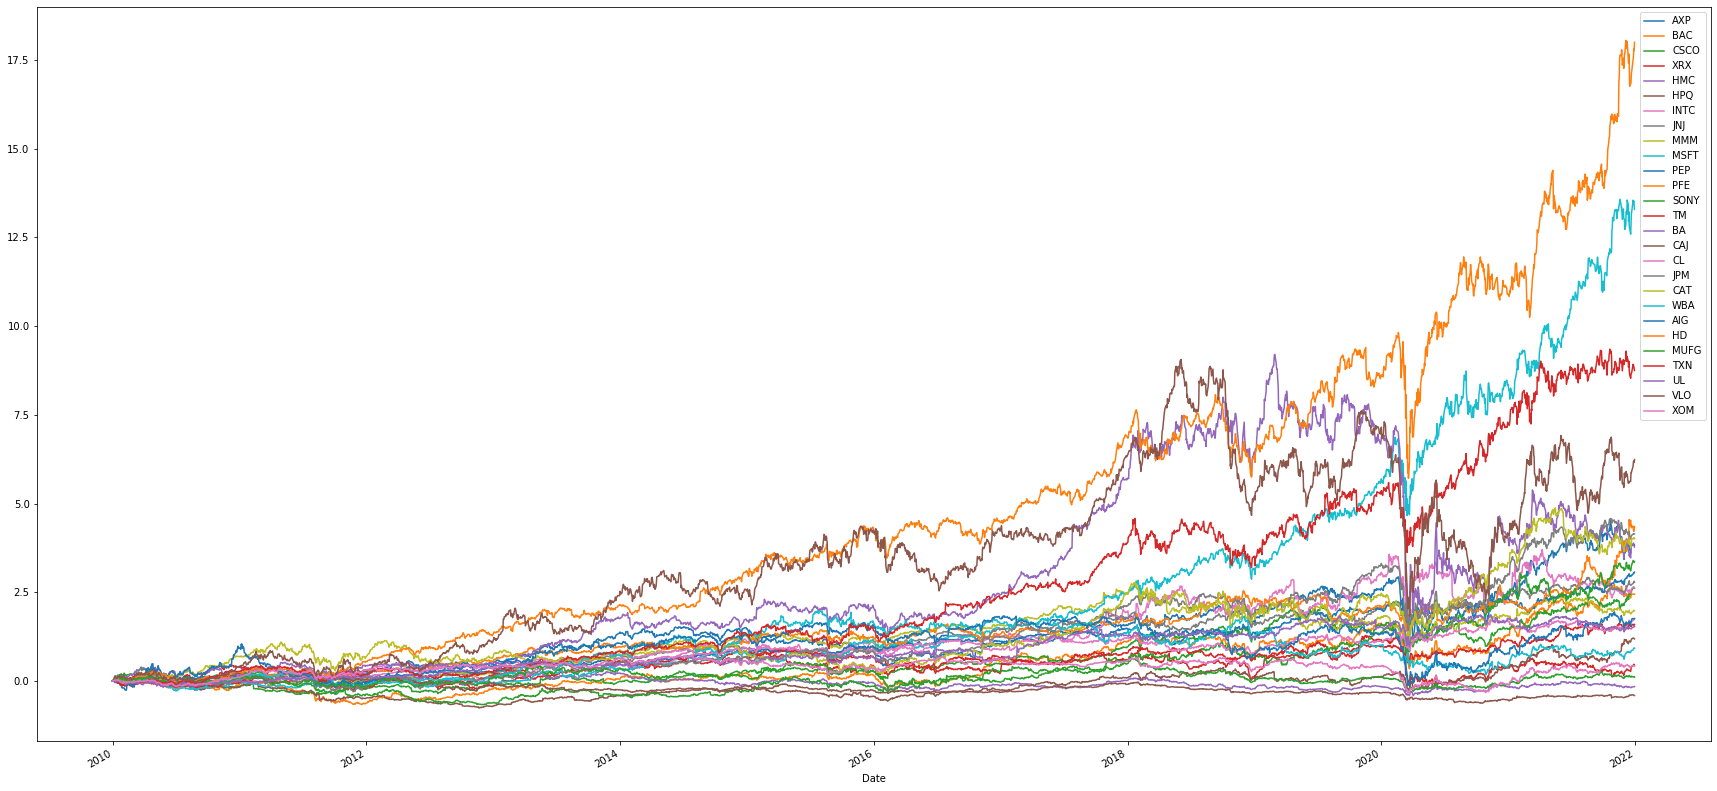

In [129]:
pf.comp_cumulative_returns().plot(legend=True, figsize=(30, 15))

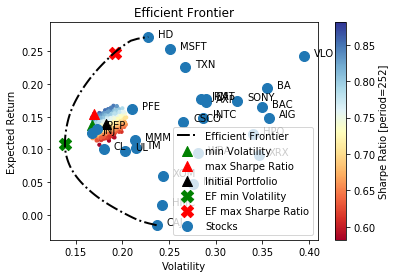

In [130]:
# performs and plots results of Monte Carlo run (5000 iterations)
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
# plots the results of the Monte Carlo optimisation
pf.mc_plot_results()
# plots the Efficient Frontier
pf.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf.plot_stocks()

From the above plot, we see that using monte carlo simulation:
    - inital portfolio returned a portfolio with 15% return and 18% risk
    - EF max sharpe ratio returned a portfolio with 25% return and 18% risk
So, we can conclude that using monte carlo simulation after optmizing the init portfolio we got more return with same amount risk

In [132]:
weights = pf.ef_maximum_sharpe_ratio();
weights = weights["Allocation"].values;
weights

array([0.00000000e+00, 7.85922615e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.53170267e-16, 1.71906092e-16, 1.23497878e-16,
       4.24785193e-16, 2.61480513e-01, 1.85576535e-16, 1.59630357e-01,
       2.68032376e-16, 1.60719961e-16, 0.00000000e+00, 0.00000000e+00,
       2.57789620e-16, 9.46474751e-17, 1.01052741e-17, 0.00000000e+00,
       8.51730781e-17, 5.44628868e-01, 0.00000000e+00, 2.20860069e-02,
       1.17564161e-16, 1.21742548e-02, 0.00000000e+00])

Conclusion: 
So, after applying three different optimization techniques, we can conculde that Monte Carlo Simulation using finquant library worked better with 25% of return and 18% of risk. 

-----------------------------------------------------------------------

In [ ]:
# BackTesting using Monte carlo simulation (finquant library)

In [2]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [80]:
def getCurrStockPrice(stock_data):
    end_stock_price = stock_data.tail(1).T
    end_stock_price_value = end_stock_price.set_axis(['end_stock_price'], axis=1, inplace=False)
    end_stock_price_value = end_stock_price_value["end_stock_price"].values
    return end_stock_price_value;

In [81]:
def getInitStockPrice(stock_data):
    stock_price = stock_data.head(1).T #startDate stock Prices
    stock_price_value = stock_price.set_axis(['stock_price'], axis=1, inplace=False) #renaming column name
    stock_price_value = stock_price_value["stock_price"].values
    return stock_price_value;

In [82]:
def getNoOfShares(total_stock_value,stock_price_value):
    NoOfShares = total_stock_value/stock_price_value
    return NoOfShares;

In [83]:
def plotMontecarloSimulation(pf):
    # performs and plots results of Monte Carlo run (5000 iterations)
    opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
    weights = pf.ef_maximum_sharpe_ratio();
    weights = weights["Allocation"].values;
    return weights;

In [84]:
from finquant.portfolio import build_portfolio

def getOptPortfolio(start,end,tk):
    stock_data = yf.download(tk , start = start, end = end)['Adj Close']
    stock_data = stock_data.iloc[1: , :];
    #curr_stock_data = stock_data.tail(1);
    init_stock_data = stock_data;
    stock_data.drop(stock_data.tail(1).index,inplace=True)
    pf = build_portfolio(data=stock_data); #init portfolio
    weights = plotMontecarloSimulation(pf)
    return weights,stock_data;

In [85]:
from dateutil.relativedelta import relativedelta
from datetime import datetime
from datetime import timedelta
from datetime import date
import datetime as dt

def nextIterationDates(start):
    d = dt.datetime.strptime(start, "%Y-%m-%d")
    # Convert datetime object to date object.
    d = d.date()
    #print(d.isoformat())
    start_date = d + relativedelta(months=+6)
    #print(type(start_date))
    startDate = start_date.strftime('%Y-%m-%d')
    endDate = start_date + timedelta(days=366)
    endDate = endDate.strftime('%Y-%m-%d')
    return startDate,endDate

In [86]:
def brokerage(trade_value, brokerage):
    return trade_value*brokerage

In [87]:
initial_capital = 100000
brokerage_rate = 0.1/100

In [88]:
tk=["AXP","BAC","CSCO","XRX","HMC","HPQ","INTC","JNJ","MMM","MSFT","PEP","PFE","SONY","TM","BA","CAJ","CL","JPM","CAT","WBA","AIG","HD","MUFG","TXN","UL","VLO","XOM"];
start = '2015-04-01';#including previous date
end = '2016-04-02';#excluding giving date
print("ITERATION:",0)
print("StartDate:",start)
print("EndDate:",end)
initial_wt,stock_data = getOptPortfolio(start,end,tk) # initial portfolio weightage

d = {'startDate':[], 'wt':[], 'qty':[], 'price':[], 'value':[], 'brokerage':[]}


initial_capital = initial_capital*(1-brokerage_rate)
brokerage = initial_capital*brokerage_rate
print("INIT CAPITAL:",initial_capital)
total_value = initial_wt*initial_capital
#print("alloc:",total_value)
value=np.sum(total_value)
curr_stock_price = getCurrStockPrice(stock_data);
qty = getNoOfShares(total_value,curr_stock_price);

# update the dictionary with initial portfiolio details
d["startDate"].append(start) 
d["wt"].append(initial_wt) #weights
d['qty'].append(qty) #No.Of Shares
d['price'].append(curr_stock_price) #curr price
d["value"].append(value) #init total alloc amt
d["brokerage"].append(brokerage)
pd.DataFrame(d)

for i in range(1, 4):
    print("ITERATION:",i)
    start,end = nextIterationDates(start);
    print("StartDate:",start)
    print("EndDate:",end)
    new_wt,stock_data = getOptPortfolio(start,end,tk) # new portfolio weightage
    curr_stock_price = getCurrStockPrice(stock_data);
    new_value = np.sum(curr_stock_price*qty)#new capital  
    #print("new_value-new capital:",new_value)
    old_qty = qty
    qty = getNoOfShares(new_value,curr_stock_price); #No.Of Shares
    new_alloc_amt = np.sum(new_value*new_wt)
    print("NEW CAPITAL:",new_alloc_amt)
    diff_qty = old_qty-qty #diff in No.Of Shares
    trade_val = np.sum(np.abs(diff_qty*curr_stock_price)) # amt used for selling/purchasing
    brokerage = trade_val* brokerage_rate
    new_value = new_alloc_amt - brokerage
    qty = getNoOfShares(new_value*new_wt,curr_stock_price); # update qty after brokerage
    
    d["startDate"].append(start) 
    d["wt"].append(new_wt)
    d['qty'].append(qty)
    d['price'].append(curr_stock_price)
    d["value"].append(new_value)
    d["brokerage"].append(brokerage)
#pd.DataFrame(d).value.plot()

ITERATION: 0
StartDate: 2015-04-01
EndDate: 2016-04-02
[*********************100%***********************]  27 of 27 completed
INIT CAPITAL: 99900.0
ITERATION: 1
StartDate: 2015-10-01
EndDate: 2016-10-01
[*********************100%***********************]  27 of 27 completed
NEW CAPITAL: 102184.0457936747
ITERATION: 2
StartDate: 2016-04-01
EndDate: 2017-04-02
[*********************100%***********************]  27 of 27 completed
NEW CAPITAL: 109501.42369330282
ITERATION: 3
StartDate: 2016-10-01
EndDate: 2017-10-02
[*********************100%***********************]  27 of 27 completed
NEW CAPITAL: 121138.26086858619


In [89]:
np.round(pd.DataFrame(d).brokerage, 2) #brokerage for each semister

0      99.90
1    2656.79
2    2847.04
3    3149.59
Name: brokerage, dtype: float64

In [90]:
np.round(pd.DataFrame(d).value, 2) #final capitals after deduction of brokerage

0     99900.00
1     99527.26
2    106654.39
3    117988.67
Name: value, dtype: float64

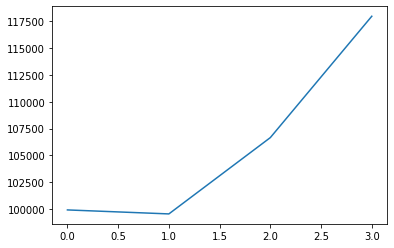

In [91]:
pd.DataFrame(d).value.plot()

- Final profit from 1,00,000 Rs investment after 2 years is 17,988 Rs with brokerage deduction.